# data analysis


In [64]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


data = pd.read_csv("mushrooms.csv")
mushrooms = data.copy()

mushrooms.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [65]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [66]:
print(f"Total rows: {mushrooms.shape[0]}")
print(f"Total columns: {mushrooms.shape[1]}")

Total rows: 8124
Total columns: 23


* checking for missing data

In [67]:
print(mushrooms.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


there is none.

* checking for duplicated data

In [68]:
mushrooms.duplicated().sum()


0

* looking at the unique counts of columns

In [69]:
mushrooms.agg(['nunique']).T.sort_values(['nunique'], ascending=[False])

,nunique
gill-color,12
cap-color,10
spore-print-color,9
odor,9
stalk-color-below-ring,9
stalk-color-above-ring,9
habitat,7
cap-shape,6
population,6
ring-type,5


gill color(12) and cap color(10) seem to have the most. 

veil type(1) only has one, so it can be removed before modeling.

In [70]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


* examining the target

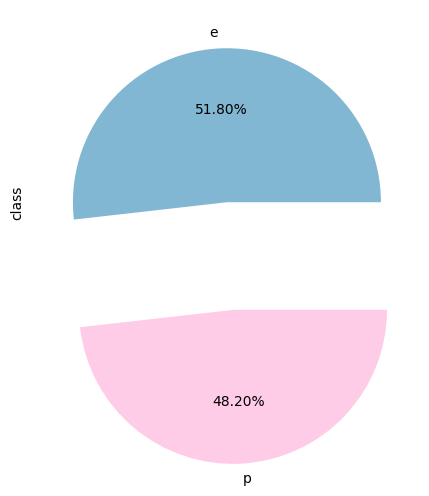

In [71]:
ax = mushrooms['class'].value_counts().plot.pie(explode=[0, 0.7],
                                                colors=["#81b7d2", "#ffcce7"],
                                                autopct='%.2f%%',
                                                figsize=(15, 5)
)



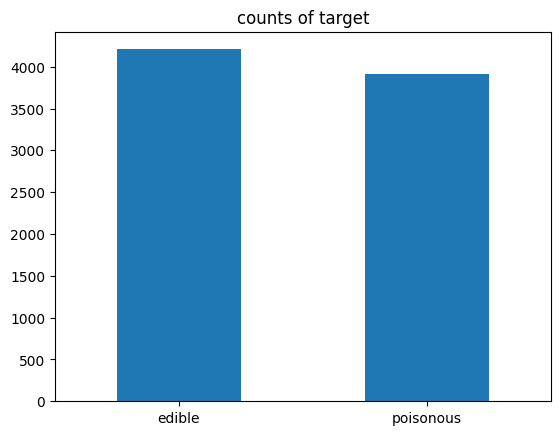

In [72]:
t = pd.DataFrame(mushrooms['class'].value_counts())
t.rename(index={'e':'edible'},inplace=True)
t.rename(index={'p':'poisonous'},inplace=True)
t.plot.bar(rot=0, title='counts of target', legend=False)
plt.show()

data is roughly balanced. 

* analysing which columns are linked to poisonous ones


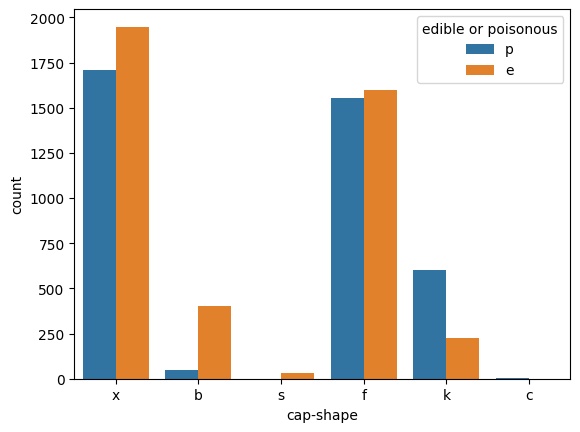

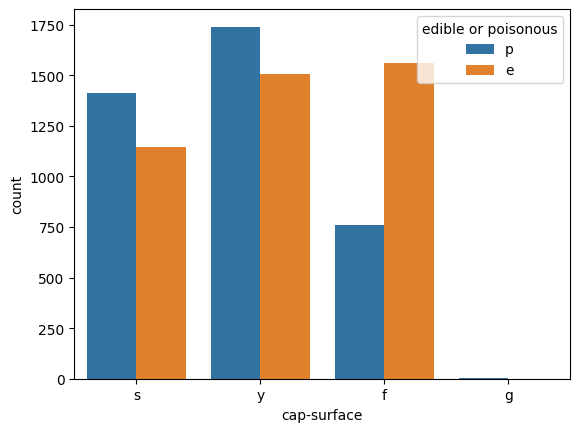

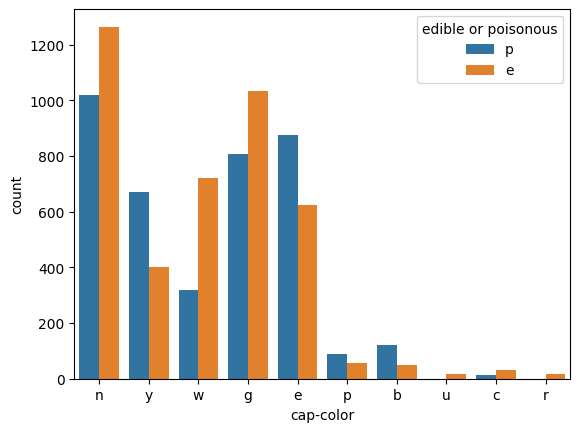

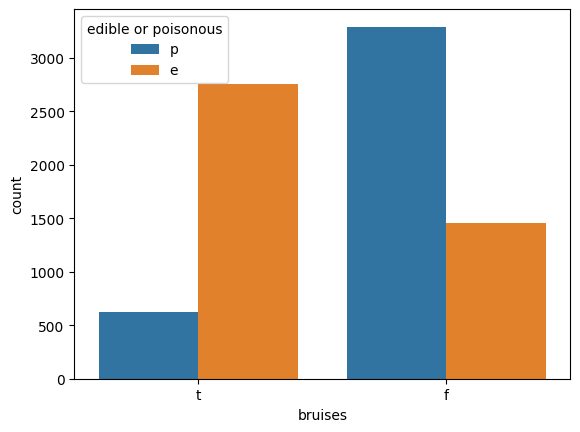

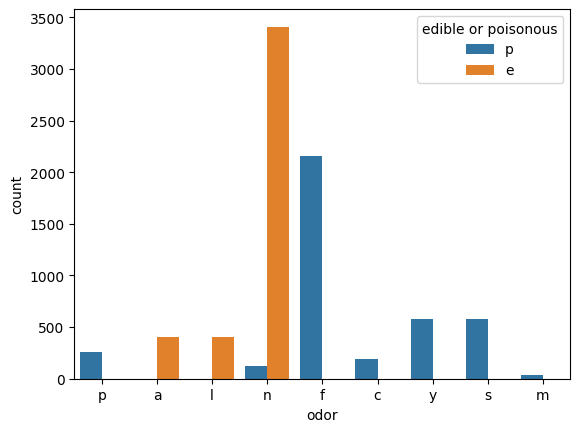

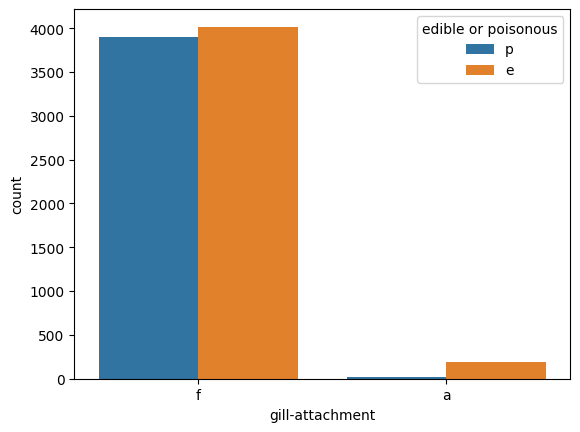

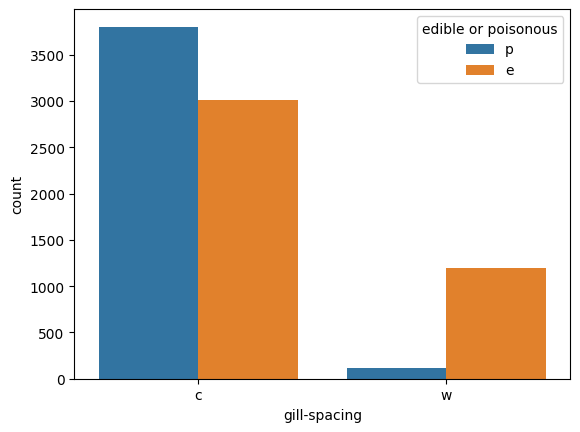

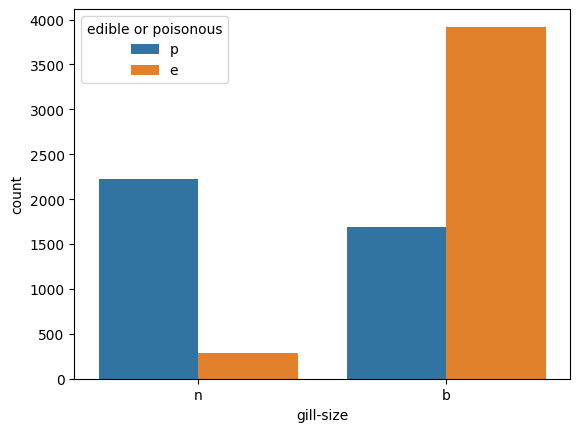

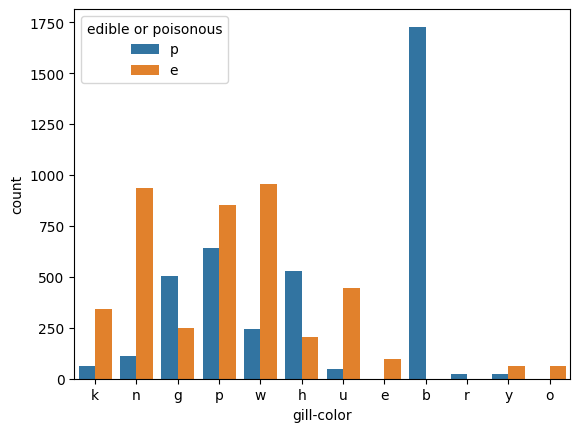

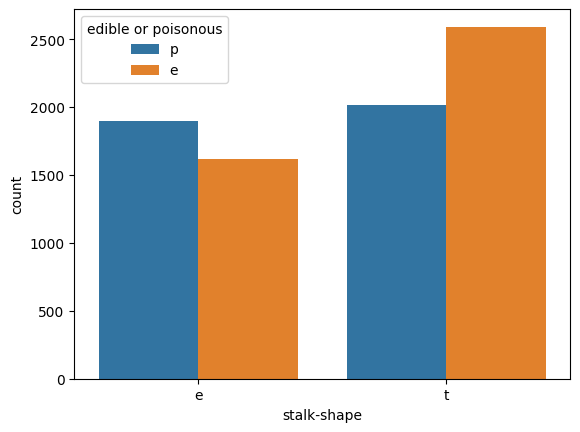

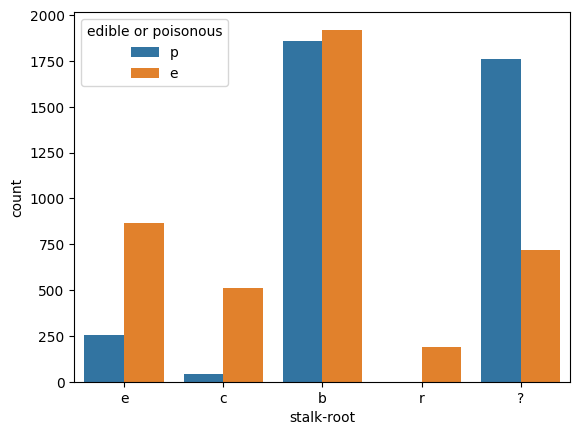

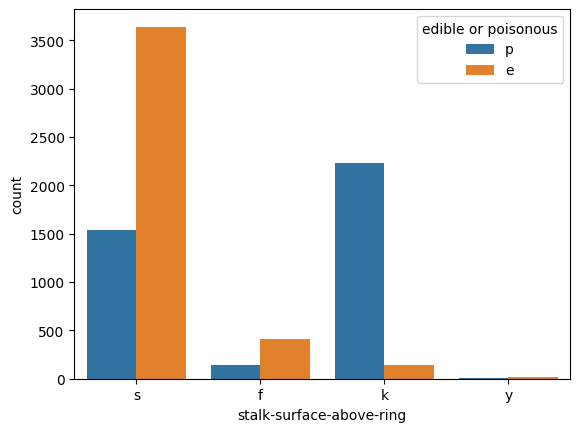

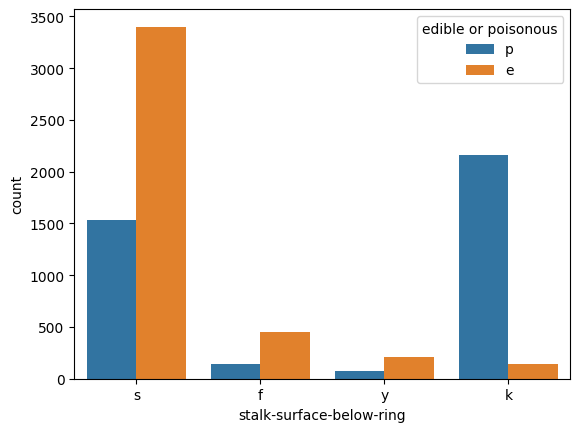

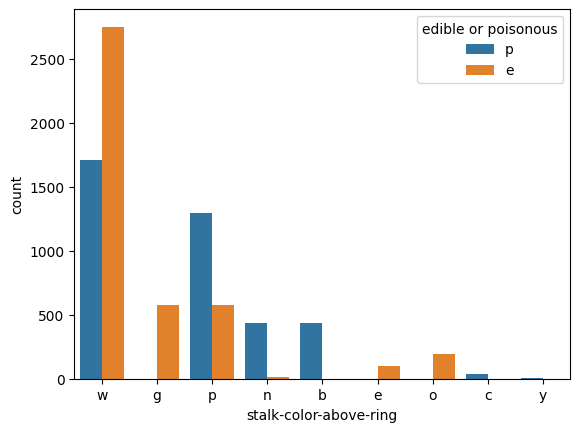

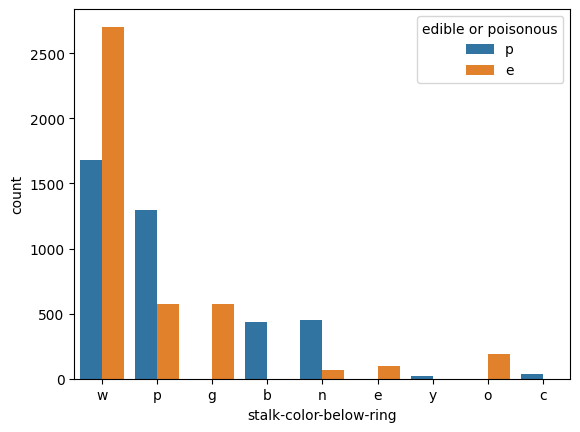

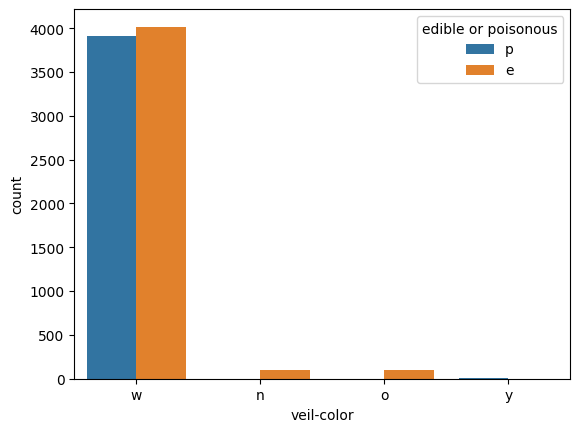

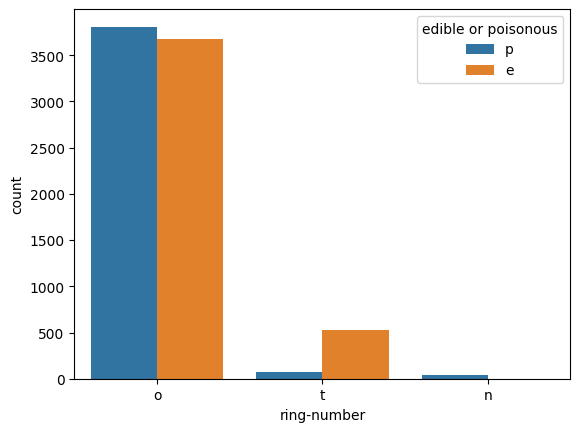

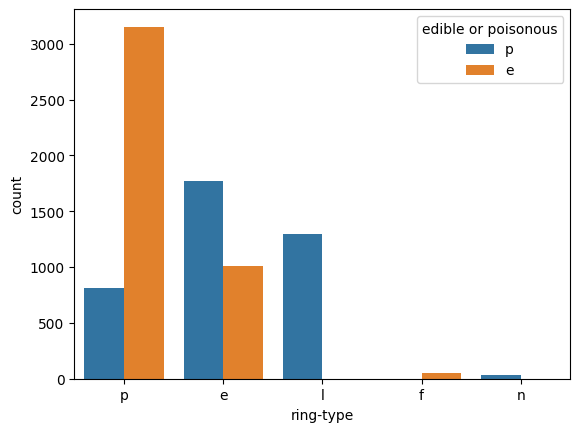

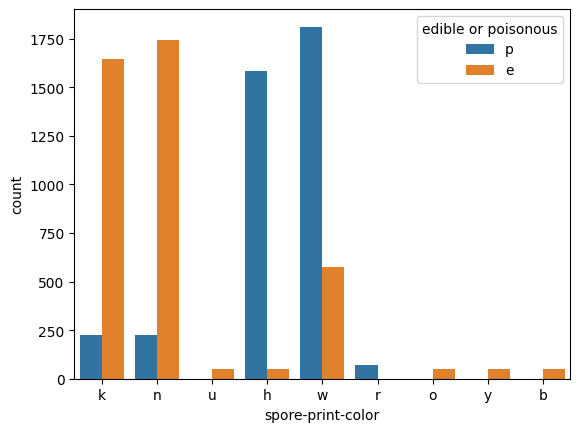

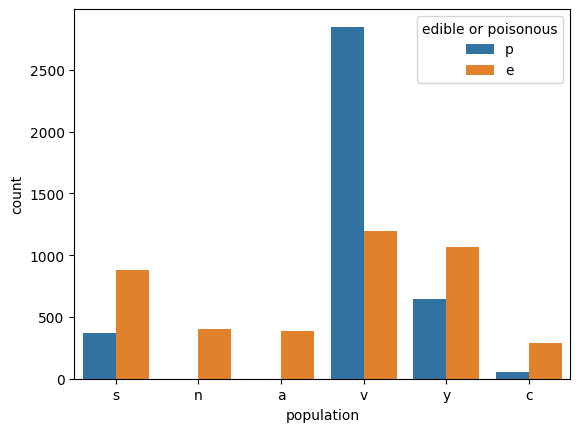

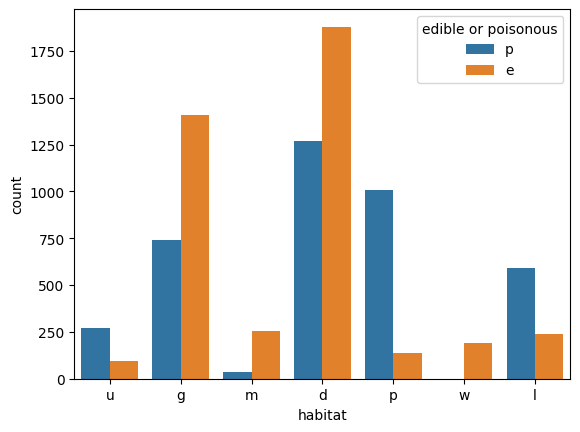

In [73]:
for column in mushrooms:
    if column not in ["class", "veil-type"]:
        pl = sb.countplot(data=mushrooms, x=column, hue='class')
        pl.legend(title='edible or poisonous')
        plt.show()
    else:
        pass

* dropping the veil type(it has only one distinct class)

In [74]:
mushrooms.drop(["veil-type"], axis=1).head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g




* splitting data into sets

In [75]:
from sklearn.model_selection import train_test_split

mushrooms = mushrooms.astype('category')

y = mushrooms['class']
X = mushrooms.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_train

array([['p'],
       ['e'],
       ['p'],
       ...,
       ['e'],
       ['p'],
       ['e']], dtype=object)



* ordinal encoding

In [76]:
from sklearn.preprocessing import OrdinalEncoder
  
encoder = OrdinalEncoder() 
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


pd.DataFrame(y_train)

,0
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
5681,1.0
5682,0.0
5683,0.0
5684,1.0


poisonous ones are encoded as 1 while edible mushrooms are encoded as 0.


* one-hot encoding

In [77]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(X_train)

X_train = encoder.transform(X_train).toarray()
X_test = encoder.transform(X_test).toarray()

X_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])